## Rasterize a polygon

Example from [here](https://pygis.io/docs/e_raster_rasterize.html).

In [11]:
# Import libraries
import geopandas as gp
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio import features
from rasterio.plot import show
from rasterio.enums import MergeAlg

In [7]:
# Read in vector and get list of geometries for all features in vector file
vector = gp.read_file("C:/Users/neliq/Documents/NIF/Rothamsted/shapefiles/soil_layer.shp")
geom = [shapes for shapes in vector.geometry]

In [8]:
# Open example raster
raster = rio.open("C:/Users/neliq/Documents/NIF/Rothamsted/rasters/covsL5_soil_field_1.tif")

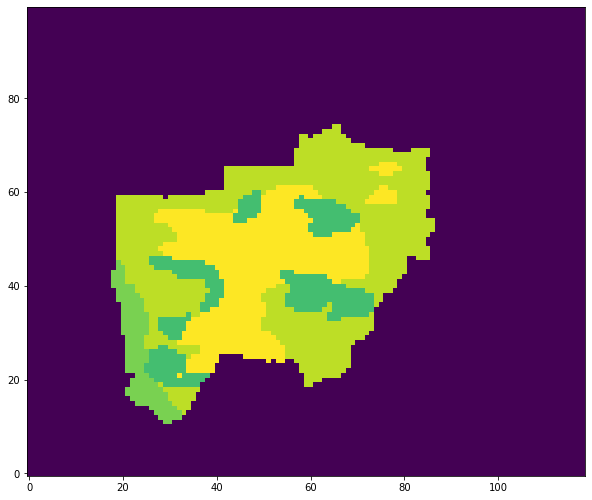

In [14]:
# create tuples of geometry, value pairs, where value is the attribute value you want to burn
geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector['Soil_Code']))

# Rasterize vector using the shape and transform of the raster
rasterized = features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = True,
                                fill = -5,   # background value
                                merge_alg = MergeAlg.replace)

# Plot raster
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized, ax = ax)
plt.gca().invert_yaxis()

In [15]:
# Export raster
with rio.open("rasterized_soil.tif", "w",
        driver = "GTiff",
        transform = raster.transform,
        dtype = rio.int16,
        count = 1,
        width = raster.width,
        height = raster.height) as dst:
    dst.write(rasterized, indexes = 1)